# PHÂN LỚP IRIS BẰNG THUẬT TOÁN GAUSSIAN NAIVE BAYES
### Bộ môn: Machine Learning
### Nội dung:
- Tìm hiểu thuật toán Naive Bayes
- EDA: phân tích và trực quan hóa dữ liệu Iris
- Tiền xử lý dữ liệu
- Huấn luyện Gaussian Naive Bayes thủ công
- So sánh với sklearn GaussianNB
- Đánh giá mô hình và đưa ra kết luận


#### Import thư viện

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#### Load dữ liệu Iris

In [3]:
df = pd.read_csv("dataset/Iris.csv")
df.drop(columns=["Id"], inplace=True)
df.head()


SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

#### Thông tin dataset

In [4]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Histogram

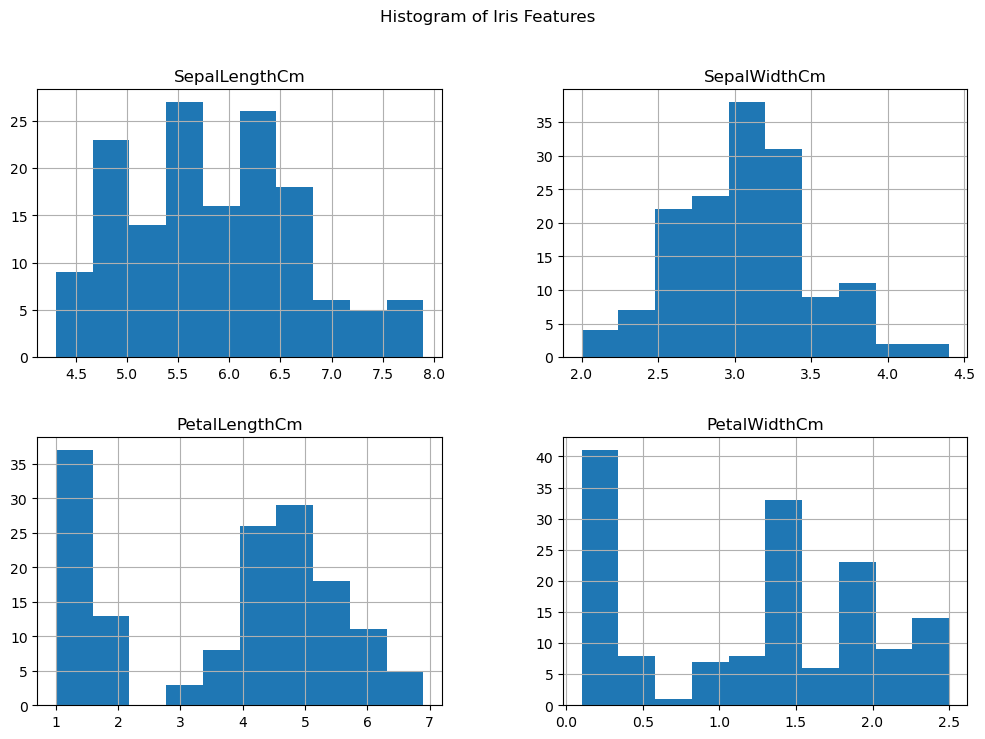

In [5]:
df.iloc[:, :-1].hist(figsize=(12,8))
plt.suptitle("Histogram of Iris Features")
plt.show()


#### Heatmap tương quan

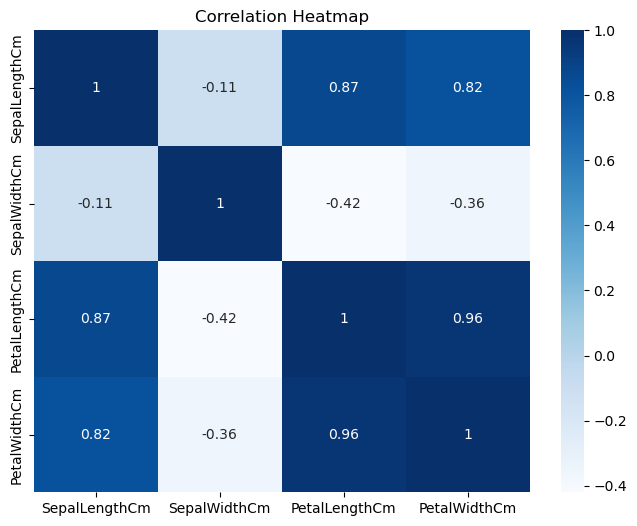

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


#### Pairplot

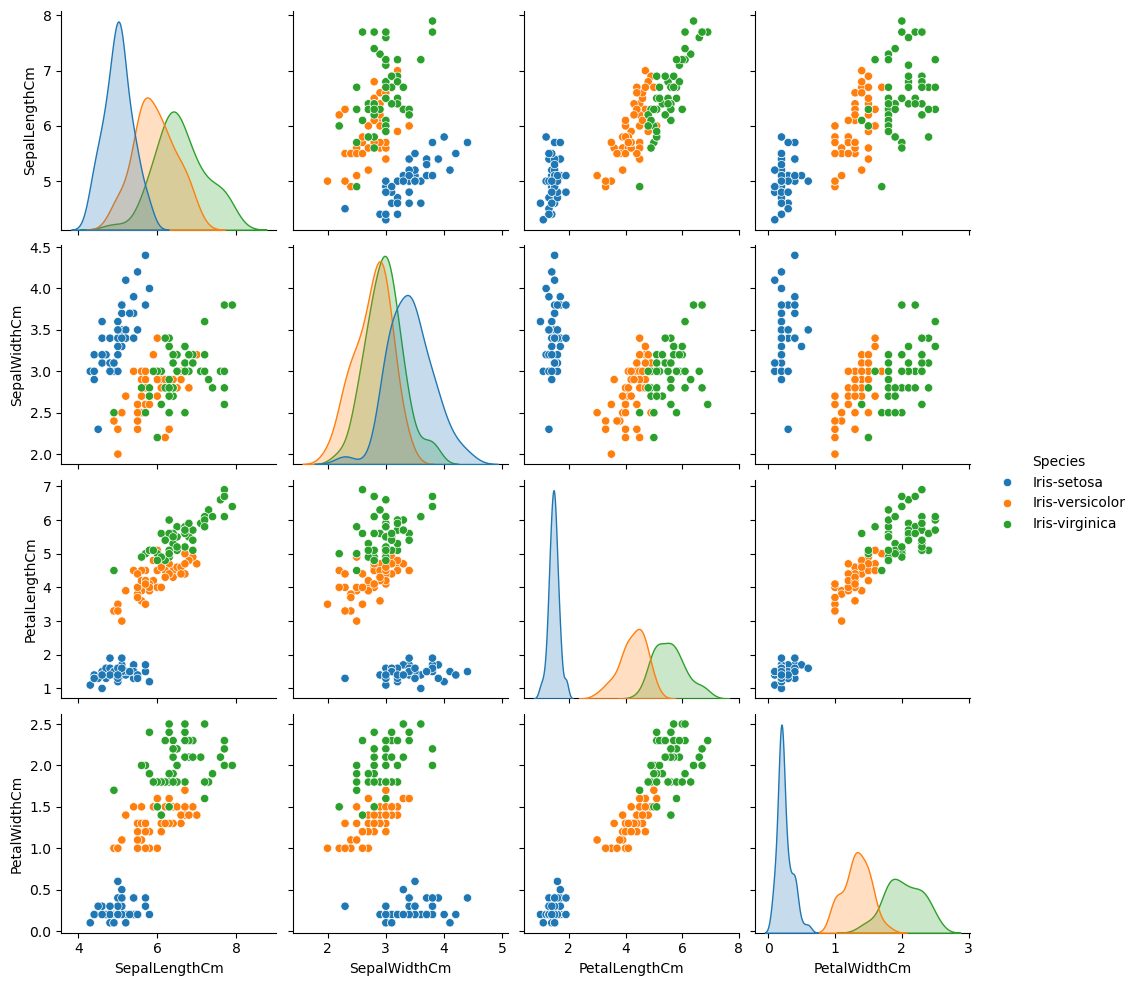

In [7]:
sns.pairplot(df, hue="Species")
plt.show()


#### Chuyển dữ liệu sang X, y

In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


#### Chia train/test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)


#### Cài đặt Gaussian Naive Bayes thủ công

In [10]:
class MyGaussianNB:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.priors = {}

        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = X_c.mean(axis=0)
            self.var[c] = X_c.var(axis=0)
            self.priors[c] = X_c.shape[0] / X.shape[0]

    def gaussian_pdf(self, x, mean, var):
        eps = 1e-6
        return (1 / np.sqrt(2 * np.pi * (var + eps))) * np.exp(- (x - mean)**2 / (2 * (var + eps)))

    def predict_one(self, x):
        posteriors = {}

        for c in self.classes:
            prior = np.log(self.priors[c])
            likelihood = np.sum(np.log(self.gaussian_pdf(x, self.mean[c], self.var[c])))
            posteriors[c] = prior + likelihood
        return max(posteriors, key=posteriors.get)

    def predict(self, X):
        return np.array([self.predict_one(x) for x in X])


#### Train Naive Bayes thủ công

In [11]:
nb = MyGaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)
print("Accuracy (manual NB):", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Accuracy (manual NB): 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



#### So sánh với sklearn GaussianNB

In [12]:
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred_sklearn = clf.predict(X_test)
print("Accuracy (sklearn NB):", accuracy_score(y_test, y_pred_sklearn))
print(classification_report(y_test, y_pred_sklearn))


Accuracy (sklearn NB): 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



#### Confusion Matrix

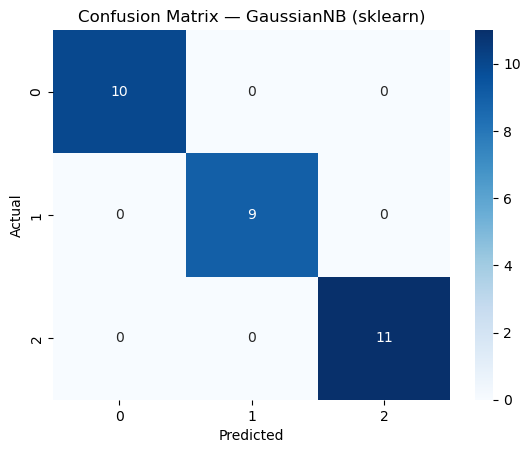

In [13]:
cm = confusion_matrix(y_test, y_pred_sklearn)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix — GaussianNB (sklearn)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
